# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 读取数据

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

我们计划先利用`titanic_train.csv`训练预测模型，因此读取数据方面，当前只需要导入`titanic_train.csv`。

通过Pandas的`read_csv`函数，将原始数据文件`titanic_train.csv`里的数据内容，解析为DataFrame并赋值给变量`ori_data`

In [88]:
ori_data = pd.read_csv("titanic_train.csv")
ori_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`ori_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数据和原始的数据，我们创建新的变量`clean_data`，让它为`ori_data`复制出的副本。我们之后的清理步骤都将被运用在`clean_data`上。

In [6]:
clean_data = ori_data.copy()

### 数据整齐度

In [7]:
clean_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


从输出结果来看，`clean_data`共有891条观察值，其中`Age`、`Cabin`和`Embarked`存在缺失值，将在后续进行评估和清理。

数据类型方面，`PassengerId`表示乘客ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。

并且，我们已知`Survived`（是否幸存）、`Pclass`（船舱等级）、`Sex`（性别）、`Embarked`（登船港口）都是分类数据，可以把数据类型都转换为Category。

In [9]:
clean_data['PassengerId'] = clean_data['PassengerId'].astype('str')
clean_data['Survived'] = clean_data['Survived'].astype('category')
clean_data['Pclass'] = clean_data['Pclass'].astype('category')
clean_data['Sex'] = clean_data['Sex'].astype('category')
clean_data['Embarked'] = clean_data['Embarked'].astype('category')

In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


### 处理缺失数据

从`info`方法的输出结果来看，在`clean_data`中，`Age`、`Cabin`和`Embarked`变量存在缺失值。

In [11]:
clean_data[clean_data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177条观察值的年龄变量缺失，占总体数据比例20%左右。由于这些观察值数量较多，且的其它变量仍然能为分析提供价值，我们最好保留这些行。

但由于我们后面需要用到的逻辑回归函数Logit不允许数据中包含缺失值，所以用乘客年龄平均值对缺失值进行填充。

In [12]:
clean_data['Age'] = clean_data['Age'].fillna(clean_data['Age'].mean())
print(clean_data['Age'].isna().sum())

0


In [13]:
clean_data[clean_data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [14]:
clean_data[clean_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

### 处理重复数据

根据数据变量的含义以及内容来看，`PassengerId`是乘客的唯一标识符，不应该存在重复，因此查看是否存在重复值。

In [15]:
print(clean_data['PassengerId'].duplicated().sum())

0


输出结果为0，说明不存在重复值。

### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [16]:
clean_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
clean_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
clean_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
clean_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

从以上输出结果来看，均不存在不一致数据。

### 处理无效或错误数据

In [20]:
clean_data.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁。同乘伴侣/同胞数量最大值为8个，最小为0个。同乘父母/孩子数量最大值为6个，最小值为0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

## 探索数据

In [21]:
sns.set_palette('pastel')

In [22]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [26]:
import matplotlib
matplotlib.rc("font",family = 'Microsoft YaHei')

### 幸存比例

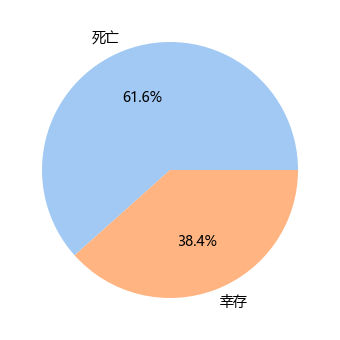

In [29]:
survived_count = clean_data['Survived'].value_counts()
plt.pie(survived_count, labels=['死亡', '幸存'], autopct='%.1f%%')
plt.show()

从以上饼图来看，泰坦尼克号遇难乘客多于幸存乘客，比例约为3:2

### 乘客年龄

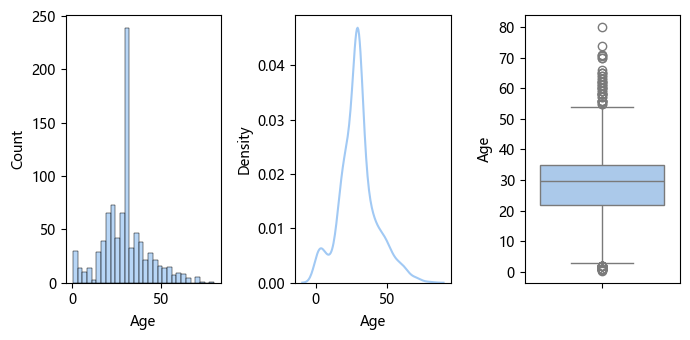

In [38]:
figure, axes = plt.subplots(1, 3)
sns.histplot(clean_data, x = 'Age', ax = axes[0])
sns.kdeplot(clean_data, x = 'Age', ax = axes[1])
sns.boxplot(clean_data, y = 'Age', ax = axes[2])
plt.show()

### 乘客年龄与是否幸存

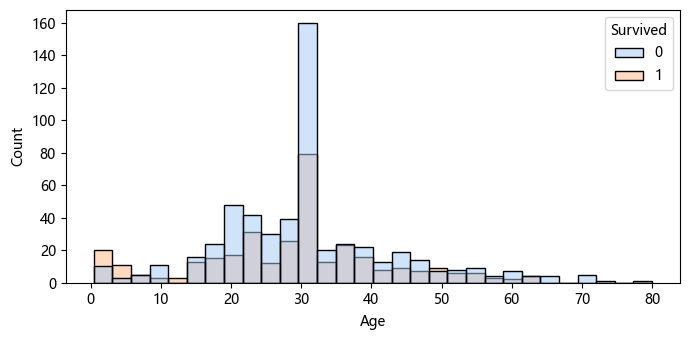

In [36]:
sns.histplot(clean_data, x='Age', hue='Survived')
plt.show()

从乘客年龄直方图来看，只有婴儿群体幸存比例较高，绝大部分其余年龄段都是遇难人数多于幸存人数。

### 船票金额分布

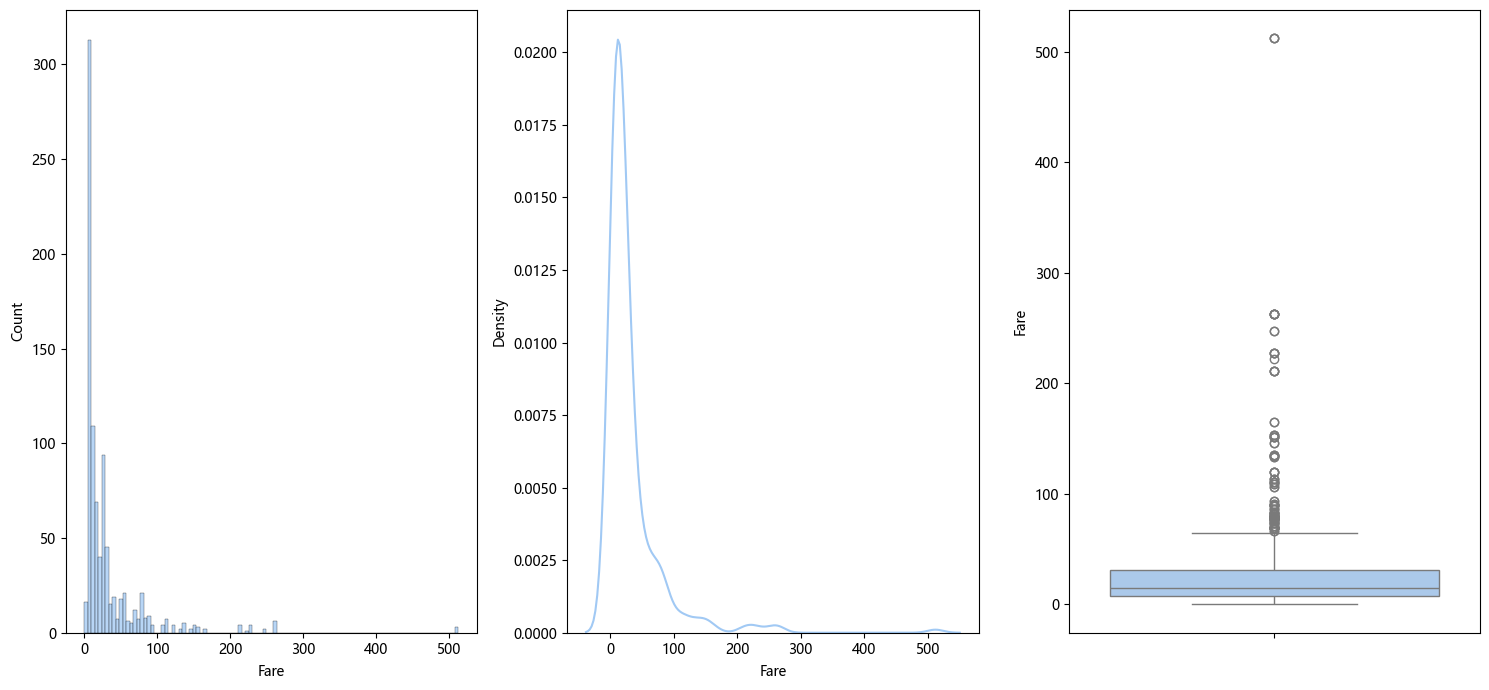

In [41]:
figure, axes = plt.subplots(1, 3, figsize = [15, 7])
sns.histplot(clean_data, x = 'Fare', ax = axes[0])
sns.kdeplot(clean_data, x = 'Fare', ax = axes[1])
sns.boxplot(clean_data, y = 'Fare', ax = axes[2])
plt.show()

船票金额呈右偏态分布，说明数据集中的大多数船票价格中等，但有一些票价很高的极端值，使得均值被拉高

### 船舱等级与是否幸存的关系

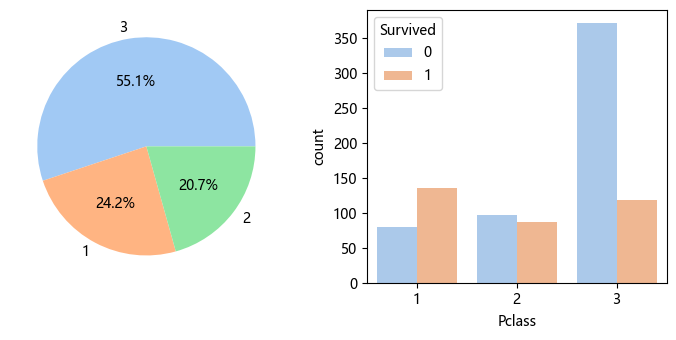

In [45]:
figure, axes = plt.subplots(1, 2)
counts = clean_data['Pclass'].value_counts()
label = counts.index
axes[0].pie(counts, labels = label, autopct = '%.1f%%')
sns.countplot(clean_data, x = 'Pclass', hue = 'Survived', ax = axes[1])
plt.show()

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大

### 性别与是否幸存的关系

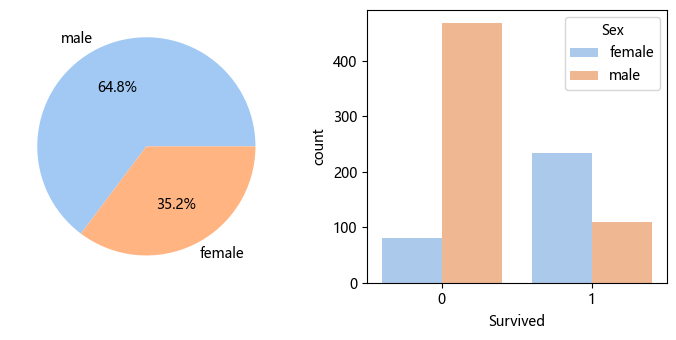

In [47]:
figure, axes = plt.subplots(1, 2)
counts = clean_data['Sex'].value_counts()
label = counts.index
axes[0].pie(counts, labels = label, autopct = '%.1f%%')
sns.countplot(clean_data, x = 'Survived', hue = 'Sex', ax = axes[1])
plt.show()

从是否幸存与性别之间的柱状图来看，男性乘客遇难比例更大，女性乘客幸存比例更大

### 登船港口与是否幸存的关系

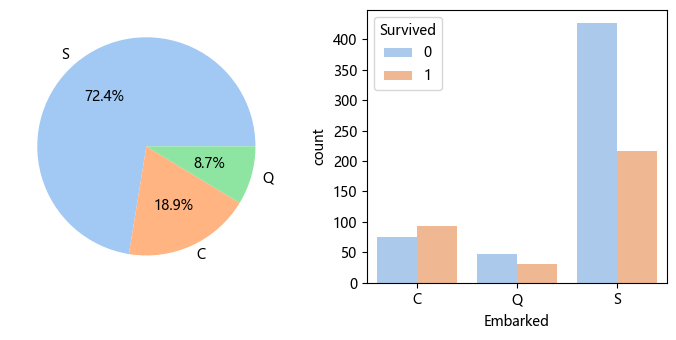

In [48]:
figure, axes = plt.subplots(1, 2)
counts = clean_data['Embarked'].value_counts()
label = counts.index
axes[0].pie(counts, labels = label, autopct = '%.1f%%')
sns.countplot(clean_data, x = 'Embarked', hue = 'Survived', ax = axes[1])
plt.show()

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反。

## 分析数据

In [49]:
import statsmodels.api as sm

In [51]:
ana_data = clean_data.copy()
ana_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


移除大概率不会影响乘客幸存概率的变量

In [52]:
ana_data = ana_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
ana_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该类别

In [53]:
ana_data = pd.get_dummies(ana_data, columns = ['Pclass', 'Sex'], drop_first = True, dtype = int)
ana_data

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,0,1,1
1,1,38.000000,1,0,71.2833,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0
3,1,35.000000,1,0,53.1000,0,0,0
4,0,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0
888,0,29.699118,1,2,23.4500,0,1,0
889,1,26.000000,0,0,30.0000,0,0,1


提取因变量和自变量

In [54]:
y = ana_data['Survived']
X = ana_data.drop('Survived', axis = 1)

查看各个变量之间的相关性

In [55]:
X.corr().abs()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
Age,1.000000,0.232625,0.179191,0.091566,0.006589,0.281004,0.084153
SibSp,0.232625,1.000000,0.414838,0.159651,0.055932,0.092548,0.114631
Parch,0.179191,0.414838,1.000000,0.216225,0.000734,0.015790,0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.118557,0.413333,0.182333
Pclass_2,0.006589,0.055932,0.000734,0.118557,1.000000,0.565210,0.064746
Pclass_3,0.281004,0.092548,0.015790,0.413333,0.565210,1.000000,0.137143
Sex_male,0.084153,0.114631,0.245489,0.182333,0.064746,0.137143,1.000000


查看相关性热力图

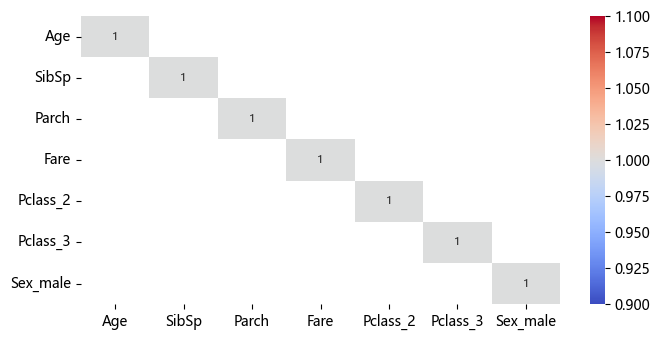

In [58]:
mask = X.corr().abs() < 0.8
sns.heatmap(X.corr().abs(), annot = True, annot_kws = {"size": 8}, mask = mask, cmap = "coolwarm")
plt.show()

从热力图可以得知各个变量之间相关性并不是很高

添加截距

In [59]:
X = sm.add_constant(X)

调用Logit函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息

In [60]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.442576
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.3354
Time:                        11:34:38   Log-Likelihood:                -394.34
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.452e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8409      0.447      8.602      0.000       2.966       4.716
Age           -0.0395      0.008     -5.035      0.000      -0.055      -0.024
SibSp         -0.3501      0.110     -3.194      0.001      -0.565      -0.135
Parch         -0.1133      0.118     -0.964      0.335      -0.344       0.117
Fare           0.0030      0.002      1.223      0.221      -0.002       0.008
Pclass_2      -1.0231      0.294     -3.481      0.000      -1.599      -0.447
Pclass_3      -2.1499      0.290     -7.423      0.000      -2.718      -1.582
Sex_male      -2.7609      0.199    -13.856      0.000      -3.151      -2.370
==============================================================================
"""

模型认为`Parch`和`Fare`对模型没有显著预测作用，因此去除这两个数据后再次建立模型

In [62]:
X = X.drop(['Parch', 'Fare'], axis = 1)
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.3336
Time:                        11:37:32   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.366e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0274      0.400     10.072      0.000       3.244       4.811
Age           -0.0399      0.008     -5.111      0.000      -0.055      -0.025
SibSp         -0.3583      0.104     -3.437      0.001      -0.563      -0.154
Pclass_2      -1.1898      0.262     -4.544      0.000      -1.703      -0.677
Pclass_3      -2.3478      0.243     -9.668      0.000      -2.824      -1.872
Sex_male      -2.7402      0.194    -14.110      0.000      -3.121      -2.360
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘伴侣/同胞数、不在一等舱、性别为男性

要理解各个各个自变量系数的实际含义，需要计算自然常数的次方。

In [64]:
# Age
print(np.exp(-0.0399))

0.9608855229003458


以上结果说明，年龄每增加1岁，生还概率降低4%左右。

In [65]:
# SibSp
print(np.exp(-0.3583))

0.6988633845391665


以上结果说明，每多一名同乘伴侣成员/同胞，生还概率降低30%左右。

In [66]:
# Pclass_2
print(np.exp(-1.1898))

0.3042821144043483


以上结果说明，二等舱乘客的生还概率比一等舱乘客低71%左右。

In [67]:
# Pclass_3
print(np.exp(-2.3478))

0.095579205335138


以上结果说明，三等舱乘客的生还概率比一等舱乘客低90%左右。

In [69]:
# Sex_male
print(np.exp(-2.7402))

0.0645574341151107


以上结果说明，男性乘客的生还概率比女性乘客低94%左右

根据模型参数值，可以得出：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘伴侣成员/同胞少的乘客幸存概率更高。

## 预测数据

In [70]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


由于逻辑回归模型不允许数据中有缺失值，因此我们需要检查`test`是否存在数据缺失

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


从以上输出可见，`Age`、`Fare`、`Cabin`存在缺失值。其中`Fare`和`Cabin`不属于回归模型的自变量，即使缺失也不会影响预测，因此可以忽略；`Age`需要我们进行和针对`clean_data`同样的操作，即用平均值填充。

In [73]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
print(test['Age'].isna().sum())

0


先给分类变量引入虚拟变量，然后给模型用到的分类变量引入虚拟变量

In [74]:
test['Pclass'] = pd.Categorical(test['Pclass'], categories=['1', '2', '3'])
test['Sex'] = pd.Categorical(test['Sex'], categories=['female', 'male'])
test['Embarked'] = pd.Categorical(test['Embarked'], categories=['C', 'Q', 'S'])

In [75]:
test = pd.get_dummies(test, drop_first=True, columns=['Pclass', 'Sex'], dtype=int)
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


查看一下模型需要的输入变量

In [76]:
model.params

const       4.027424
Age        -0.039853
SibSp      -0.358260
Pclass_2   -1.189830
Pclass_3   -2.347799
Sex_male   -2.740218
dtype: float64

去除`test`中不需要的变量

In [78]:
X_test = test[['Age', 'SibSp', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)
X_test.head()

,const,Age,SibSp,Pclass_2,Pclass_3,Sex_male
0,1.0,34.5,0,0,0,1
1,1.0,47.0,1,0,0,0
2,1.0,62.0,0,0,0,1
3,1.0,27.0,0,0,0,1
4,1.0,22.0,1,0,0,0


In [79]:
predicted_value = model.predict(X_test)
predicted_value

0      0.478086
1      0.857672
2      0.234395
3      0.552600
4      0.942264
         ...   
413    0.520179
414    0.922239
415    0.438532
416    0.520179
417    0.431067
Length: 418, dtype: float64

把概率大于等于0.5的预测为幸存，小于0.5的预测为遇难，输出一下这个最终的预测结果

In [82]:
predicted_value = predicted_value > 0.5
predicted_value.replace({True : '幸存',
                         False : '遇难'}, inplace = True)
predicted_value

0      遇难
1      幸存
2      遇难
3      幸存
4      幸存
       ..
413    幸存
414    幸存
415    遇难
416    幸存
417    遇难
Length: 418, dtype: object

In [85]:
test['Survived'] = predicted_value
predict = test[['Name', 'Survived']]
predict

,Name,Survived
0,"Kelly, Mr. James",遇难
1,"Wilkes, Mrs. James (Ellen Needs)",幸存
2,"Myles, Mr. Thomas Francis",遇难
3,"Wirz, Mr. Albert",幸存
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",幸存
...,...,...
413,"Spector, Mr. Woolf",幸存
414,"Oliva y Ocana, Dona. Fermina",幸存
415,"Saether, Mr. Simon Sivertsen",遇难
416,"Ware, Mr. Frederick",幸存


In [87]:
predict.to_csv('predict.csv', index = False)